# Linear Regression

#  Load Dependecies

In [28]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.layers import Dropout , BatchNormalization, Dense
from tensorflow.keras.models import Sequential 
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load and Split Data

In [29]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

## Looking at the Data

In [30]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [31]:
y_train[0]

15.2

## Design Neural Network

In [32]:
model = Sequential()

model.add(Dense(32, input_dim=13, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                448       
                                                                 
 batch_normalization_6 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_7 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                

## Configure Model

In [34]:
model.compile(loss='mean_absolute_error', optimizer='adam', )

## Mean Absolute Error (MAE)
This loss function is defined based on the difference between what model predict and the truth value.To calculate the MAE, you take the difference between your model’s predictions and the ground truth, apply the absolute value to that difference, and then average it out across the whole dataset.

In [35]:
from IPython.display import HTML
html1 = '<img src="MAE.jpg" width="400" height="100" align="center"/>'
HTML(html1)

Since we are taking the absolute value, all of the errors will be weighted on the same linear scale. Thus, we won’t be putting too much weight on our outliers and our loss function provides a generic and even measure of how well our model is performing.

In [36]:
model.fit(x_train, y_train, batch_size=8, epochs=32, verbose=1, validation_data=(x_test, y_test)) 

Epoch 1/32
51/51 [==============================] - 1s 6ms/step - loss: 22.2185 - val_loss: 22.0056
Epoch 2/32
51/51 [==============================] - 0s 3ms/step - loss: 21.9074 - val_loss: 21.8439
Epoch 3/32
51/51 [==============================] - 0s 3ms/step - loss: 21.5424 - val_loss: 22.1022
Epoch 4/32
51/51 [==============================] - 0s 3ms/step - loss: 20.9702 - val_loss: 21.5406
Epoch 5/32
51/51 [==============================] - 0s 3ms/step - loss: 20.4620 - val_loss: 20.5039
Epoch 6/32
51/51 [==============================] - 0s 3ms/step - loss: 19.5500 - val_loss: 19.6493
Epoch 7/32
51/51 [==============================] - 0s 3ms/step - loss: 18.6675 - val_loss: 18.1247
Epoch 8/32
51/51 [==============================] - 0s 2ms/step - loss: 17.4185 - val_loss: 15.9580
Epoch 9/32
51/51 [==============================] - 0s 2ms/step - loss: 16.1655 - val_loss: 13.9654
Epoch 10/32
51/51 [==============================] - 0s 3ms/step - loss: 14.6105 - val_loss: 16.3770

In [37]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 5.0797


5.079712390899658

In [38]:
y_test[64]

23.1

In [39]:
float(model.predict(np.reshape(x_test[64],[1,13])))

22.58837127685547

## Mean Squared Error (MSE)

This loss function is defined based on the squared of the difference between what model predict and the truth value. To calculate the MSE, you take the difference between your model’s predictions and the ground truth, square it, and average it out across the whole dataset.

In [40]:
html1 = '<img src="MSE.jpg" width="400" height="100" align="center"/>'
HTML(html1)

Unlike the MAE, The MSE is great for ensuring that our trained model has no outlier predictions with huge errors, since the MSE puts larger weight on theses errors due to the squaring part of the function. But if our model makes a single very bad prediction, the squaring part of the function magnifies the error. Yet in many practical cases we don’t care much about these outliers and are aiming for more of a well-rounded model that performs good enough on the majority.

In [41]:
model = Sequential()

model.add(Dense(32, input_dim=13, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

In [42]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                448       
                                                                 
 batch_normalization_8 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_9 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                

In [43]:
model.compile(loss='mean_squared_error', optimizer='adam', )

In [44]:
model.fit(x_train, y_train, batch_size=8, epochs=32, verbose=1, validation_data=(x_test, y_test))

Epoch 1/32
51/51 [==============================] - 1s 4ms/step - loss: 570.0552 - val_loss: 692.9622
Epoch 2/32
51/51 [==============================] - 0s 2ms/step - loss: 552.8611 - val_loss: 622.1007
Epoch 3/32
51/51 [==============================] - 0s 2ms/step - loss: 530.9175 - val_loss: 575.9173
Epoch 4/32
51/51 [==============================] - 0s 2ms/step - loss: 510.9949 - val_loss: 541.5597
Epoch 5/32
51/51 [==============================] - 0s 2ms/step - loss: 482.5265 - val_loss: 459.1501
Epoch 6/32
51/51 [==============================] - 0s 2ms/step - loss: 461.0469 - val_loss: 435.1597
Epoch 7/32
51/51 [==============================] - 0s 2ms/step - loss: 425.4749 - val_loss: 383.5298
Epoch 8/32
51/51 [==============================] - 0s 3ms/step - loss: 386.7021 - val_loss: 367.7201
Epoch 9/32
51/51 [==============================] - 0s 2ms/step - loss: 353.1664 - val_loss: 232.9590
Epoch 10/32
51/51 [==============================] - 0s 3ms/step - loss: 307.1054 

In [45]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 26.2461


26.24606704711914

In [46]:
float(model.predict(np.reshape(x_test[64],[1,13])))

23.77813720703125

## Huber Loss

Now we know that the MSE is great for learning outliers while the MAE is great for ignoring them. But what about something in the middle?
Consider an example where we have a dataset of 100 values we would like our model to be trained to predict. Out of all that data, 25% of the expected values are 5 while the other 75% are 10.
An MSE loss wouldn’t quite do the trick, since we don’t really have “outliers”; 25% is by no means a small fraction. On the other hand we don’t necessarily want to weight that 25% too low with an MAE. Those values of 5 aren’t close to the median (10 — since 75% of the points have a value of 10), but they’re also not really outliers.
Our solution?
The Huber Loss Function.
The Huber Loss offers the best of both worlds by balancing the MSE and MAE together. We can define it using the following piecewise function:

In [47]:
html1 = '<img src="Huber.jpg" width="600" height="150" align="center"/>'
HTML(html1)

For loss values less than delta, use the MSE; for loss values greater than delta, use the MAE.
Using the MAE for larger loss values mitigates the weight that we put on outliers so that we still get a well-rounded model. At the same time we use the MSE for the smaller loss values to maintain a quadratic function near the centre.
This has the effect of magnifying the loss values as long as they are greater than 1. Once the loss for those data points dips below 1, the quadratic function down-weights them to focus the training on the higher-error data points.


In [48]:
model = Sequential()

model.add(Dense(32, input_dim=13, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='linear'))

In [49]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                448       
                                                                 
 batch_normalization_10 (Bat  (None, 32)               128       
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_11 (Bat  (None, 16)               64        
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                

In [50]:
model.compile(loss=keras.losses.Huber(delta=0.1), optimizer='adam', )

In [51]:
model.fit(x_train, y_train, batch_size=8, epochs=32, verbose=1, validation_data=(x_test, y_test))

Epoch 1/32
51/51 [==============================] - 1s 5ms/step - loss: 2.2198 - val_loss: 2.1069
Epoch 2/32
51/51 [==============================] - 0s 2ms/step - loss: 2.1853 - val_loss: 2.1243
Epoch 3/32
51/51 [==============================] - 0s 2ms/step - loss: 2.1467 - val_loss: 2.0627
Epoch 4/32
51/51 [==============================] - 0s 2ms/step - loss: 2.1035 - val_loss: 2.0182
Epoch 5/32
51/51 [==============================] - 0s 2ms/step - loss: 2.0342 - val_loss: 2.0290
Epoch 6/32
51/51 [==============================] - 0s 3ms/step - loss: 1.9675 - val_loss: 2.0260
Epoch 7/32
51/51 [==============================] - 0s 3ms/step - loss: 1.8669 - val_loss: 1.9256
Epoch 8/32
51/51 [==============================] - 0s 2ms/step - loss: 1.7633 - val_loss: 1.7515
Epoch 9/32
51/51 [==============================] - 0s 2ms/step - loss: 1.6322 - val_loss: 1.5946
Epoch 10/32
51/51 [==============================] - 0s 3ms/step - loss: 1.4716 - val_loss: 1.5009
Epoch 11/32
51/51 [

In [52]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.3937


0.39374619722366333

In [53]:
float(model.predict(np.reshape(x_test[64],[1,13])))

23.254756927490234

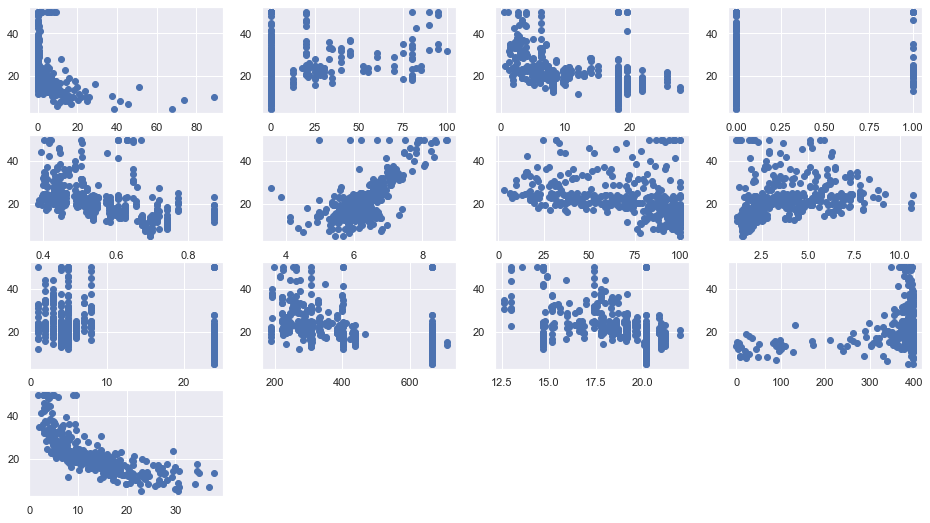

In [54]:
plt.figure(figsize = (16,9))
for i in range(13):
   plt.subplot(4,4,i+1)
   plt.scatter(x_train[:,i],y_train)
sns.set()
plt.show()